In [1]:
#Import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [3]:
csv = '../lifespan_merged_datasets/mergedworms_companyDrug.csv'# Read the CSV file
data = pd.read_csv(csv)
np.random.seed(42)

In [6]:
print(data.isna().sum())

# print(f"Shape {data.shape}")
# # Print all column headers
# print(data.columns)

Unnamed: 0                    0
group                         0
average_speed                 0
average_distance_per_frame    0
maximal_distance_traveled     0
average_change_in_pixels      0
average_angular_speed         0
distance_travaled             0
distance_travaled.1           0
average_change_speed          0
time_elapsed_(hours)          0
std_speed                     2
std/mean                      2
roaming_fraction              0
lifespan                      0
drugged                       0
worm_id                       0
dtype: int64


In [4]:
# Count occurrences of values in the 'worm_id' column
value_counts = data['worm_id'].value_counts()

# Print the counts
# print(value_counts.sort_values(axis=0, ascending=False))

47    84
3     84
37    84
27    84
25    84
43    84
2     84
11    84
9     84
7     84
5     84
44    84
32    84
24    84
12    84
10    84
8     84
4     84
19    84
45    83
46    83
42    83
41    82
23    80
17    72
30    72
6     72
26    72
28    72
34    72
21    72
40    72
31    72
14    71
15    70
29    70
20    67
18    60
13    60
39    60
1     60
48    60
16    60
35    60
38    60
33    59
36    55
22    48
Name: worm_id, dtype: int64


In [5]:
value_counts.shape

(48,)

In [6]:
from training_functions import *
#splits data by worm id into train and test, 80/20 test train split
train_data, test_data = split_by_worm_id(data, test_size=0.2)
X_train, y_train, X_test, y_test = train_test_x_and_y(train_data, test_data)

In [7]:
# test_value_counts = test_data['worm_id'].value_counts()
# train_value_counts = train_data['worm_id'].value_counts()

In [8]:
#Check to make sure it works
# train_value_counts.shape

In [9]:
from training_functions import *
#splits data by worm id into train and test, 80/20 test train split
train_data, test_data = split_by_worm_id(data, test_size=0.2)


# train_data.loc(train_data['std_speed'] == None)

X_train, y_train, X_test, y_test = train_test_x_and_y(train_data, test_data)


In [10]:
# # Check for NaN values in X_train and y_train
# print("NaNs in X_train:", np.isnan(X_train).any())
# print("NaNs in y_train:", np.isnan(y_train).any())

# Check for infinity values in X_train
# print("Infinity values in X_train:", np.isinf(X_train).any())

# sample imputing (NEED TO IMPROVE) -- ONLY TEMPORARY
if np.isnan(X_train).any().any() or np.isnan(X_test).any().any():
  # Impute missing values with the median
  imputer = SimpleImputer(strategy='median')
  X_train = imputer.fit_transform(X_train)
  X_test = imputer.fit_transform(X_test)



NaNs in X_train: id                          False
average_speed               False
average_change_in_pixels    False
average_angular_speed       False
total_distance_traveled     False
distance_traveled_bin       False
time_elapsed_(hours)        False
std_speed                    True
std/mean                     True
roaming_fraction            False
lifespan                    False
dtype: bool
NaNs in y_train: False
Infinity values in X_train: id                          False
average_speed               False
average_change_in_pixels    False
average_angular_speed       False
total_distance_traveled     False
distance_traveled_bin       False
time_elapsed_(hours)        False
std_speed                   False
std/mean                    False
roaming_fraction            False
lifespan                    False
dtype: bool


# Models

## Logistic Regression

In [11]:

scaler_train = StandardScaler()
scaler_train.fit(X_train)
scaled_X_train = scaler_train.transform(X_train)


scaler_test = StandardScaler()
scaler_test.fit(X_test)
scaled_X_test = scaler_test.transform(X_test)

model = LogisticRegression(penalty='l2', max_iter=700, multi_class='multinomial', class_weight={0:0.5,1:0.25,2:0.25}, solver='saga')
# model = LogisticRegression(penalty='l2', max_iter=700, multi_class='multinomial')

model.fit(scaled_X_train, y_train)

# Make predictions
y_pred = model.predict(scaled_X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7485714285714286
Precision: 0.6321953990343653
Recall: 0.7485714285714286
F1-score: 0.6717089985486211
Confusion Matrix:
 [[328   0   1]
 [ 32 196   0]
 [143   0   0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [12]:
print(scaled_X_train)

[[-1.70443769e+00  3.54523500e-01 -1.35581173e-03 ... -2.51086395e-01
   7.80467366e-01  1.37439780e+00]
 [-1.70344190e+00  9.25923130e-01 -2.50205344e-02 ...  1.24966174e+00
  -3.70104499e-01  1.37439780e+00]
 [-1.70244611e+00 -9.74682518e-02  1.67710356e-02 ... -2.85984875e-01
   2.91772465e-01  1.37439780e+00]
 ...
 [ 1.79277655e+00 -3.82108862e-01  3.64906922e-03 ... -8.42432780e-01
  -7.57942966e-01 -1.22193043e+00]
 [ 1.79377234e+00 -3.82030990e-01  7.99842117e-03 ... -6.98038568e-01
  -7.57942966e-01 -1.22193043e+00]
 [ 1.79476813e+00 -3.76379142e-01  2.84170231e-02 ... -8.35471215e-01
  -7.57942966e-01 -1.22193043e+00]]


## Decision Tree Classifier

In [13]:
# Create and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
 [[329   0   0]
 [  0 228   0]
 [  0   0 143]]


## Random Forest Classifier

In [14]:
# Create and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.71
Precision: 0.733439302632851
Recall: 0.71
F1-score: 0.7188131563990412
Confusion Matrix:
 [[206   0 123]
 [  0 228   0]
 [ 80   0  63]]


## Support Vector Machine

In [15]:
# Create and train the model
model = SVC()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6371428571428571
Precision: 0.590945846606224
Recall: 0.6371428571428571
F1-score: 0.5600201318513676
Confusion Matrix:
 [[329   0   0]
 [111 117   0]
 [143   0   0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Naive Bayes

In [16]:
# Create and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7771428571428571
Precision: 0.6809778376759509
Recall: 0.7771428571428571
F1-score: 0.7006035226392082
Confusion Matrix:
 [[326   0   3]
 [  9 217   2]
 [142   0   1]]


In [17]:
print("y_train\n", y_train.value_counts())
print("y_test\n", y_test.value_counts())

y_train
 0    1418
1     744
2     713
Name: drugged, dtype: int64
y_test
 0    329
1    228
2    143
Name: drugged, dtype: int64


## LSTM

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [19]:
# # Create the LSTM model
# model = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(LSTM(units=50))
# model.add(Dense(1))

# # Compile the model
# model.compile(loss='mean_squared_error', optimizer='adam')

# # Train the model
# model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
90/90 [==============================] - 5s 7ms/step - loss: 0.6961
Epoch 2/10
90/90 [==============================] - 1s 8ms/step - loss: 0.6798
Epoch 3/10
90/90 [==============================] - 1s 7ms/step - loss: 0.6732
Epoch 4/10
90/90 [==============================] - 1s 7ms/step - loss: 0.6641
Epoch 5/10
90/90 [==============================] - 1s 12ms/step - loss: 0.6464
Epoch 6/10
90/90 [==============================] - 1s 14ms/step - loss: 0.6186
Epoch 7/10
90/90 [==============================] - 1s 13ms/step - loss: 0.5733
Epoch 8/10
90/90 [==============================] - 1s 13ms/step - loss: 0.5398
Epoch 9/10
90/90 [==============================] - 1s 11ms/step - loss: 0.5246
Epoch 10/10
90/90 [==============================] - 1s 8ms/step - loss: 0.5057


In [20]:
y_pred = model.predict(X_test)
# Assuming y_pred contains predicted probabilities for each class
thresholds = [0.5, 1.5]
y_pred_labels = np.zeros_like(y_pred)
y_pred_labels[y_pred < thresholds[0]] = 0
y_pred_labels[(y_pred >= thresholds[0]) & (y_pred < thresholds[1])] = 1
y_pred_labels[y_pred >= thresholds[1]] = 2
y_pred_labels = y_pred_labels.astype(int)

# Assuming y_test contains the true labels
accuracy = accuracy_score(y_test, y_pred_labels)
precision = precision_score(y_test, y_pred_labels, average='weighted')
recall = recall_score(y_test, y_pred_labels, average='weighted')
f1 = f1_score(y_test, y_pred_labels, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

22/22 [==============================] - 1s 3ms/step
Accuracy: 0.32
Precision: 0.26662366305220203
Recall: 0.32
F1-score: 0.2727987518726291
Confusion Matrix:
 [[ 86 243   0]
 [ 90 138   0]
 [ 63  80   0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
np.corrcoef(train_data)

for x in train_data.columns:
    for z in train_data.columns:
        if (np.corrcoef(train_data[x], y=train_data[z]))[0][1] > 0.75 and x != z:
            print(x,z)
            print(np.corrcoef(train_data[x], y=train_data[z]))

#speed and distance are the same, drop 1
#maximal distance travelled and distance 1:1

In [22]:
train_data.head

<bound method NDFrame.head of         id  average_speed  average_change_in_pixels  average_angular_speed  \
60      60       0.937451                 -0.012129               1.365049   
61      61       1.634150                 -0.048443               1.108255   
62      62       0.386344                  0.015686               1.158382   
63      63       0.683949                  0.019406               1.526128   
64      64       0.340302                 -0.003337               1.688612   
...    ...            ...                       ...                    ...   
3570  3570       0.043177                  0.000000               1.505476   
3571  3571       0.071912                  0.001112               1.495528   
3572  3572       0.039286                 -0.004449               1.556866   
3573  3573       0.039381                  0.002225               1.475976   
3574  3574       0.046272                  0.033557               1.634871   

      total_distance_traveled  di

## K-Fold Cross Validation

In [1]:
from training_functions import *
csv = '../lifespan_merged_datasets/mergedworms_companyDrug.csv'# Read the CSV file'# Read the CSV file
data = pd.read_csv(csv)
random_state = 42


### Random Forest Classifier

In [2]:
rfc_accuracy, rfc_stdev = group_kfold_validation(data, model_select="random_forest", random_state=random_state)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        83
           1       1.00      0.71      0.83       252

    accuracy                           0.78       335
   macro avg       0.76      0.85      0.76       335
weighted avg       0.88      0.78      0.79       335


Feature Importances:
lifespan: 0.4950
total_distance_traveled: 0.1199
average_angular_speed: 0.0836
distance_traveled_bin: 0.0454
average_speed: 0.0441
std_speed: 0.0429
std/mean: 0.0414
roaming_fraction: 0.0350
time_elapsed_(hours): 0.0335
group: 0.0316
average_change_in_pixels: 0.0276
              precision    recall  f1-score   support

           0       0.72      1.00      0.84       226
           1       1.00      0.47      0.64       168

    accuracy                           0.77       394
   macro avg       0.86      0.74      0.74       394
weighted avg       0.84      0.77      0.75       394


Feature Importances:
lifespan: 0.4290
total_distance_tra

### Decision Tree Classifier

In [3]:
dtc_accuracy, dtc_stdev = group_kfold_validation(data, model_select="decision_tree", random_state=random_state)

              precision    recall  f1-score   support

           0       0.45      1.00      0.62        83
           1       1.00      0.59      0.74       252

    accuracy                           0.69       335
   macro avg       0.72      0.80      0.68       335
weighted avg       0.86      0.69      0.71       335

              precision    recall  f1-score   support

           0       0.71      1.00      0.83       226
           1       1.00      0.45      0.62       168

    accuracy                           0.77       394
   macro avg       0.86      0.73      0.73       394
weighted avg       0.83      0.77      0.74       394

              precision    recall  f1-score   support

           0       1.00      0.38      0.55       300
           1       0.31      1.00      0.48        84

    accuracy                           0.52       384
   macro avg       0.66      0.69      0.52       384
weighted avg       0.85      0.52      0.54       384

              preci

### Logistic Regression

In [4]:
log_accuracy, log_stdev = group_kfold_validation(data, model_select="logistic", random_state=random_state)

              precision    recall  f1-score   support

           0       0.53      1.00      0.69        83
           1       1.00      0.71      0.83       252

    accuracy                           0.78       335
   macro avg       0.77      0.86      0.76       335
weighted avg       0.88      0.78      0.80       335

              precision    recall  f1-score   support

           0       0.99      0.67      0.80       226
           1       0.69      0.99      0.82       168

    accuracy                           0.81       394
   macro avg       0.84      0.83      0.81       394
weighted avg       0.87      0.81      0.81       394

              precision    recall  f1-score   support

           0       0.99      0.51      0.67       300
           1       0.36      0.99      0.53        84

    accuracy                           0.61       384
   macro avg       0.68      0.75      0.60       384
weighted avg       0.85      0.61      0.64       384

              preci

### Linear SVM

In [5]:
svm_accuracy, svm_stdev = group_kfold_validation(data, model_select="svm", random_state=random_state)

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        83
           1       1.00      0.67      0.81       252

    accuracy                           0.76       335
   macro avg       0.75      0.84      0.74       335
weighted avg       0.88      0.76      0.77       335

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       226
           1       0.89      0.95      0.92       168

    accuracy                           0.93       394
   macro avg       0.93      0.93      0.93       394
weighted avg       0.93      0.93      0.93       394

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       300
           1       0.48      1.00      0.65        84

    accuracy                           0.76       384
   macro avg       0.74      0.85      0.73       384
weighted avg       0.89      0.76      0.78       384

              preci

### XGBoost

In [6]:
xgb_accuracy, xgb_stdev = group_kfold_validation(data, model_select="xgboost", random_state=random_state)

              precision    recall  f1-score   support

           0       0.52      1.00      0.68        83
           1       1.00      0.69      0.82       252

    accuracy                           0.77       335
   macro avg       0.76      0.85      0.75       335
weighted avg       0.88      0.77      0.79       335


Feature Importances:
lifespan: 0.4166
total_distance_traveled: 0.1496
average_angular_speed: 0.0909
roaming_fraction: 0.0683
average_speed: 0.0574
group: 0.0566
distance_traveled_bin: 0.0484
std_speed: 0.0448
average_change_in_pixels: 0.0341
std/mean: 0.0332
time_elapsed_(hours): 0.0000
              precision    recall  f1-score   support

           0       0.73      1.00      0.84       226
           1       1.00      0.50      0.67       168

    accuracy                           0.79       394
   macro avg       0.86      0.75      0.75       394
weighted avg       0.84      0.79      0.77       394


Feature Importances:
lifespan: 0.3795
total_distance_tra

<!-- ## Linear Regression -->

In [8]:
# lin_accuracy, lin_stdev = group_kfold_validation(data, model_select="linear", random_state=random_state)

In [11]:
results = {
    "Model": ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "SVM", "XGBoost"],
    "Mean Accuracy": [log_accuracy, dtc_accuracy, rfc_accuracy, svm_accuracy, xgb_accuracy],
    "Std Deviation": [log_stdev, dtc_stdev, rfc_stdev, svm_stdev, xgb_stdev],
}

In [12]:
# Create a DataFrame from the dictionary
results_df = pd.DataFrame(results)

# Print the table
print(f"5-fold Cross Validation with Random Seed {random_state}\n")
print(results_df)

5-fold Cross Validation with Random Seed 42

                      Model  Mean Accuracy  Std Deviation
0       Logistic Regression       0.519201       0.090461
1  Decision Tree Classifier       0.439865       0.090284
2  Random Forest Classifier       0.494260       0.085541
3                       SVM       0.431536       0.095198
4                   XGBoost       0.440228       0.072414


XGBoost Mean Accuracy: 0.9421
XGBoost Std Deviation: 0.0390


In [1]:
from training_functions import *
csv = 'mergedworms.csv'# Read the CSV file
data = pd.read_csv(csv)
random_state = 6

rfc_accuracy, rfc_stdev = group_kfold_validation(data, model_select="logistic", random_state=random_state)
print(f"Mean Accuracy: {rfc_accuracy}")
print(f"Standard Deviation: {rfc_stdev}")

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.73      0.77      0.75       443
           1       0.89      1.00      0.94       168
           2       0.06      0.04      0.05       129

    accuracy                           0.69       740
   macro avg       0.56      0.60      0.58       740
weighted avg       0.65      0.69      0.67       740



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.69      0.81      0.74       406
           1       0.95      1.00      0.97       168
           2       0.08      0.04      0.05       156

    accuracy                           0.69       730
   macro avg       0.57      0.62      0.59       730
weighted avg       0.62      0.69      0.65       730



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.53      0.87      0.66       315
           1       1.00      0.37      0.54       300
           2       0.16      0.12      0.14        72

    accuracy                           0.58       687
   macro avg       0.56      0.46      0.45       687
weighted avg       0.70      0.58      0.55       687



/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.42      0.85      0.56       202
           1       1.00      0.94      0.97       252
           2       0.09      0.01      0.02       228

    accuracy                           0.61       682
   macro avg       0.50      0.60      0.52       682
weighted avg       0.52      0.61      0.53       682

              precision    recall  f1-score   support

           0       0.48      0.64      0.55       381
           1       0.39      1.00      0.56        84
           2       0.54      0.03      0.05       271

    accuracy                           0.46       736
   macro avg       0.47      0.56      0.39       736
weighted avg       0.49      0.46      0.37       736

Mean Accuracy: 0.60
Standard Deviation: 0.09
Mean Accuracy: 0.6041616614213489
Standard Deviation: 0.08757475629459449


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


## Run for all models together

In [9]:
from training_functions import *
csv = '../lifespan_merged_datasets/mergedworms_companyDrug.csv'# Read the CSV file'# Read the CSV file
data = pd.read_csv(csv)
random_state = 42

In [10]:
# Call the function with your dataset
results = group_kfold_validation_all_models(data)

results_binary_companydrug = pd.DataFrame(results) #.sort_values(by="mean_accuracy", ascending=False)

print("\nModel Evaluation Results: Classification of CompanyDrug\n")
print(results_binary_companydrug)

# # Print results as a table
# print("\nModel Evaluation Results: Classification of CompanyDrug")
# print(f"{'Model':<15} {'Mean Accuracy':<15} {'Std Deviation':<15}")
# for model_name, metrics in results.items():
#     print(f"{model_name:<15} {metrics['mean_accuracy']:<15.4f} {metrics['std_accuracy']:<15.4f}")

Evaluating model: logistic
Evaluating model: random_forest
Evaluating model: decision_tree
Evaluating model: svm
Evaluating model: xgboost
Evaluating model: knn
Evaluating model: naive_bayes
Evaluating model: mlp_classifier
Evaluating model: stacking_classifier

Model Evaluation Results: Classification of CompanyDrug

                 model  mean_accuracy  std_deviation
0             logistic       0.675370       0.141958
1        random_forest       0.698233       0.070437
2        decision_tree       0.658873       0.090438
3                  svm       0.741053       0.137489
4              xgboost       0.635823       0.083021
5                  knn       0.465153       0.022586
6          naive_bayes       0.633849       0.074939
7       mlp_classifier       0.486598       0.178961
8  stacking_classifier       0.678577       0.083003


In [11]:
from training_functions import *
csv = '../lifespan_merged_datasets/mergedworms_terbinafin.csv'# Read the CSV file'# Read the CSV file
data = pd.read_csv(csv)
data.loc[data['drugged'] == 2, 'drugged'] = 1
random_state = 42

In [12]:
# Call the function with your dataset
results = group_kfold_validation_all_models(data)

results_binary_terbinafin = pd.DataFrame(results) #.sort_values(by="mean_accuracy", ascending=False)

print("\nModel Evaluation Results: Classification of Terbinafin\n")
print(results_binary_terbinafin)

# # Print results as a table
# print("\nModel Evaluation Results: Classification of Terbinafin")
# print(f"{'Model':<15} {'Mean Accuracy':<15} {'Std Deviation':<15}")
# for model_name, metrics in results.items():
#     print(f"{model_name:<15} {metrics['mean_accuracy']:<15.4f} {metrics['std_accuracy']:<15.4f}")

Evaluating model: logistic
Evaluating model: random_forest
Evaluating model: decision_tree
Evaluating model: svm
Evaluating model: xgboost
Evaluating model: knn
Evaluating model: naive_bayes
Evaluating model: mlp_classifier
Evaluating model: stacking_classifier

Model Evaluation Results: Classification of Terbinafin

                 model  mean_accuracy  std_deviation
0             logistic       0.272920       0.125347
1        random_forest       0.306345       0.080516
2        decision_tree       0.151252       0.142860
3                  svm       0.419421       0.032188
4              xgboost       0.167358       0.156587
5                  knn       0.453511       0.088977
6          naive_bayes       0.458993       0.279271
7       mlp_classifier       0.372215       0.237812
8  stacking_classifier       0.515698       0.075765


## Repeat with combined Dataframe

In [13]:
from training_functions import *
csv1 = '../lifespan_merged_datasets/mergedworms_companyDrug.csv'# Read the CSV file'# Read the CSV file
data1 = pd.read_csv(csv1)
csv2 = '../lifespan_merged_datasets/mergedworms_terbinafin.csv'# Read the CSV file'# Read the CSV file
data2 = pd.read_csv(csv2)
random_state = 42

# stack the two DataFrames
data3 = pd.concat([data1, data2], ignore_index=True, axis=0)

In [14]:
# Call the function with your dataset
results = group_kfold_validation_all_models(data3)

results_multiclass = pd.DataFrame(results) #.sort_values(by="mean_accuracy", ascending=False)

print("\nModel Evaluation Results: Multi-Class Classification\n")
print(results_multiclass)

Evaluating model: logistic
Evaluating model: random_forest
Evaluating model: decision_tree
Evaluating model: svm
Evaluating model: xgboost
Evaluating model: knn
Evaluating model: naive_bayes
Evaluating model: mlp_classifier
Evaluating model: stacking_classifier

Model Evaluation Results: Multi-Class Classification

                 model  mean_accuracy  std_deviation
0             logistic       0.555643       0.102025
1        random_forest       0.495251       0.046199
2        decision_tree       0.361045       0.090887
3                  svm       0.544557       0.095307
4              xgboost       0.375563       0.041506
5                  knn       0.437917       0.054565
6          naive_bayes       0.474793       0.082899
7       mlp_classifier       0.373942       0.064043
8  stacking_classifier       0.504591       0.090657


In [15]:
results_binary_companydrug["task"] = ["Binary (CompanyDrug)"] * 9
results_binary_terbinafin["task"] = ["Binary (Terbinafin)"] * 9
results_multiclass["task"] = ["Multi-class"] * 9
all_results = pd.concat([results_binary_companydrug, results_binary_terbinafin, results_multiclass])

### Plotting all Results

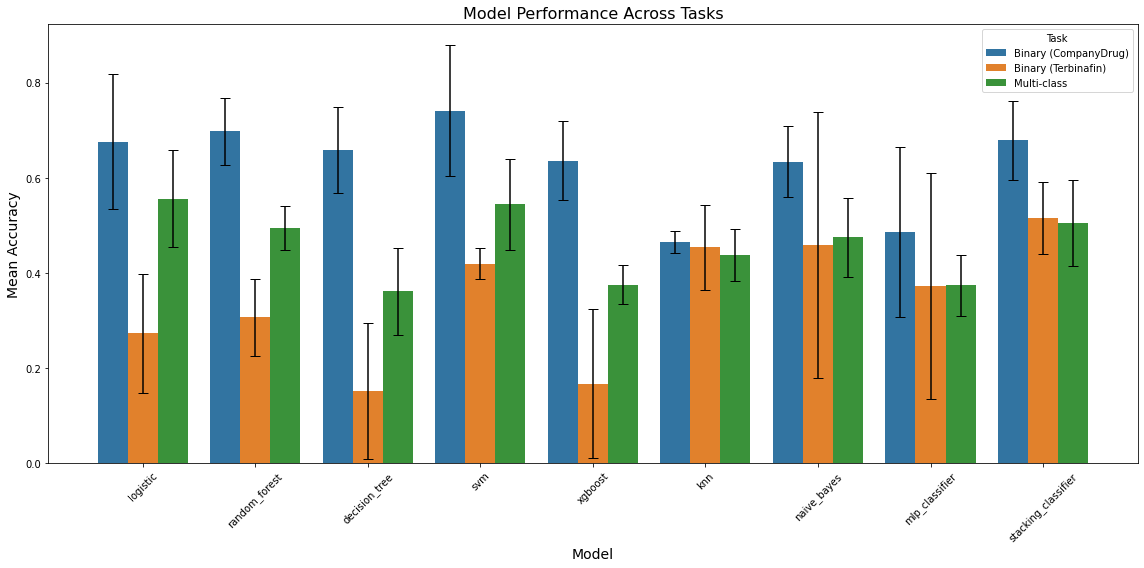

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(16, 8))

# Barplot for mean accuracy
sns.barplot(
    data=all_results,
    x="model",
    y="mean_accuracy",
    hue="task",
    ci=None  # Disable seaborn's internal confidence intervals
)

# Add error bars for individual bars
for i, bar in enumerate(plt.gca().patches):
    # Retrieve mean_accuracy and std_deviation from DataFrame
    model = all_results.iloc[i % len(all_results)]  # Handles bar group looping
    mean = model["mean_accuracy"]
    std = model["std_deviation"]
    
    # Add error bar centered at the top of the bar
    plt.errorbar(
        x=bar.get_x() + bar.get_width() / 2,  # Center of the bar
        y=mean,  # Mean value
        yerr=std,  # Standard deviation as error
        fmt='none',  # No marker
        c='black',
        capsize=5  # Small caps on error bars
    )
# Formatting the plot
plt.title("Model Performance Across Tasks", fontsize=16)
plt.ylabel("Mean Accuracy", fontsize=14)
plt.xlabel("Model", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Task")
plt.tight_layout()

# Show plot
plt.show()


Across both binary and multi-class tasks, consider:

- SVM (High accuracy across tasks, good balance of mean and std deviation).
- Random Forest (Consistently performs well with relatively low variance).
- StackingClassifier (Strong in all tasks, handles complexity well).
- Logistic Regression (Simple, effective, especially for binary classification).
- Naive Bayes (Robust baseline for both binary and multi-class tasks).


In [30]:
results_binary_companydrug.drop('task', axis=1)
results_binary_terbinafin.drop('task', axis=1)
results_multiclass.drop('task', axis=1)

# Top 5 models for each task (manually determined based on results)
top_5_classes = ["svm", "stacking_classifier", "random_forest", "logistic", "naive_bayes"]

# Filter the results for top 5 models
filtered_results_binary_companydrug = results_binary_companydrug[results_binary_companydrug["model"].isin(top_5_classes)]
filtered_results_binary_terbinafin = results_binary_terbinafin[results_binary_terbinafin["model"].isin(top_5_classes)]
filtered_results_multiclass = results_multiclass[results_multiclass["model"].isin(top_5_classes)]




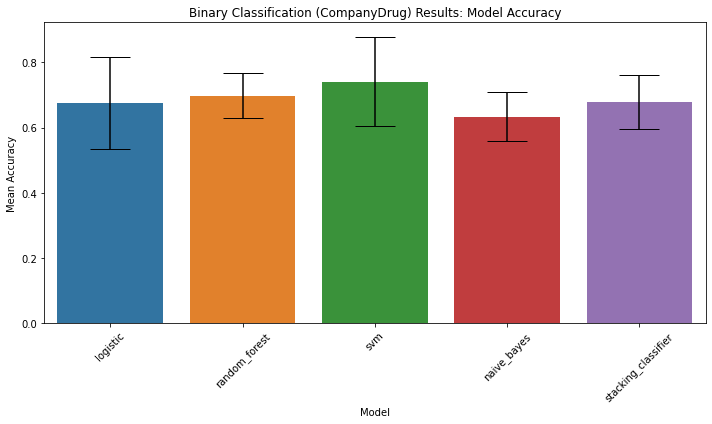

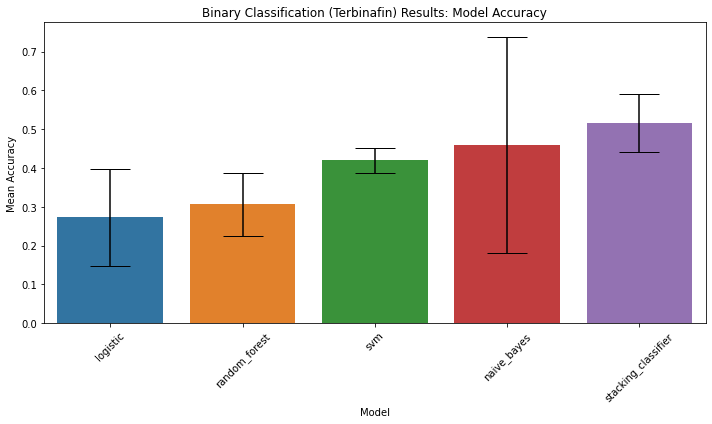

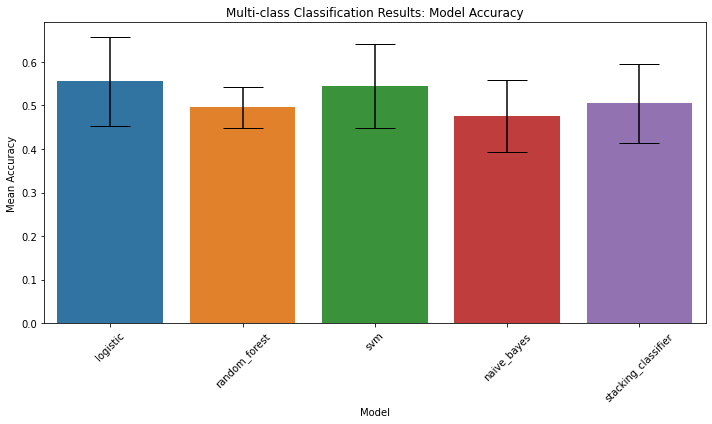

In [41]:
plots_df = [filtered_results_binary_companydrug, filtered_results_binary_terbinafin, filtered_results_multiclass]
plt.rcParams.update({'errorbar.capsize': 20})
# print(filtered_results_binary_companydrug)
count = 0
for df in plots_df:
    # print(df)
# Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='model', y='mean_accuracy', data=df, yerr=df['std_deviation'], ecolor='black')
    if count == 0:
    # Add labels and title
        plt.title('Binary Classification (CompanyDrug) Results: Model Accuracy')
    elif count == 1:
        plt.title('Binary Classification (Terbinafin) Results: Model Accuracy')
    else:
        plt.title('Multi-class Classification Results: Model Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Mean Accuracy')

    # Show the plot
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    count += 1